



# Degree, Walks, and Paths

In our previous lecture we introduced the fundamentals of different representations of networks: mathematically through graphs and their matrix representations, and computationally through the Python package NetworkX. We're now ready to start defining and measuring some more complex properties of networks.

The fundamental *point* of networks is that they are connected -- we can "move along the edges" in order to understand the network structure. Our unifying theme in this set of lecture notes is how the idea of "taking steps in the network" unifies some important ideas: node degrees, walks between nodes, and paths between nodes.


## Degree of a Node

::: {.callout-note icon=false appearance="minimal"}
::: {#def-degree}

The *degree* of a node in an undirected network is the number of edges connected to it: [A small complication in this definition is that, if there is a self-loop on node $i$, then $A_{ii} = 2$. So, when we say that the degree is the number of connected edges, we need to remember that self-loops count twice!]{.aside}
$$
    k_i = \sum_{j=1}^n A_{ij} \,.
$$

We can collect all the node degrees together into the *degree sequence* $\mathbf{k} \in \mathbb{R}^n$ whose $i$th entry is $k_i$, the degree of node $i$.

:::
:::

There is an important relationship between the degree sequence and the total number of edges $m$ in the network:

::: {.callout-important}

## Exercise

Give a formula for $m$ in terms of the degree sequence $\mathbf{k}$.

:::

::: {.hide .solution}

The key here is to notice that degree counts *ends* of edges (sometimes we call these *stubs*). This means the total number of stubs will be the sum of the degrees of all the nodes. However, each edge is counted twice (each edge has two stubs), so the number of edges $m$ in an undirected network is

$$
    m = \frac{1}{2}\sum_{i=1}^n k_i = \frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n A_{ij}\,.
$$

This relationship between degree and number of edges is a useful fact!

:::

::: {.callout-important}

## Exercise

The *mean degree* of a network is the average of the degree sequence: $c = \frac{1}{n} \sum_{i = 1}^n k_i$.
Give a formula for the mean degree in terms of $m$ and $n$ alone.  

:::

::: {.hide .solution}

Let $c$ represent the mean (or expected) degree of a node in an undirected network. Using the previous exercise,
\begin{align}
    c &= \frac{1}{n} \sum_{i = 1}^n k_i \,, \\
    &= \frac{2m}{n} \,.
\end{align}

:::

### Computing with Degrees

Let's grab some sample data. We'll use the *Les Miserables* network, which is a network of coappearances of characters in the book *Les Miserables* by Victor Hugo. Nodes represent characters and edges represent characters who appear within the same chapter. This data set is supplied as a built-in example in NetworkX, and for this reason we'll use it several times throughout these notes. [This hidden code cell imports several packages and defines an `unweight` function which we'll use to convert the network from its native weighted format to an unweighted format.]{.aside}

In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

plot_kwargs = {"node_size" : 100, "edgecolors" : 'white', "node_color" : "steelblue", "width" : 0.5, "edge_color" : "darkgrey"}
# This is a coding exercise in the live notes.

def unweight(G):
    for source, target in G.edges():
        G[source][target]['weight'] = 1
    return G

Here's how this network looks:

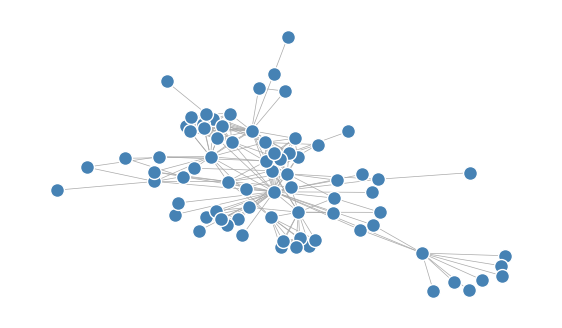

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (7, 4))
G_LesMis = unweight(nx.les_miserables_graph())
nx.draw(G_LesMis, **plot_kwargs)

Now let's compute the degree of each node. There are multiple ways to achieve this task: we can work directly using the adjacency matrix, or we can use the built-in NetworkX function `nx.degree()`.

One way to compute the degrees of the nodes in a graph is to use the adjacency matrix, as directly described by @def-degree. With convenient functions from NetworkX and NumPy, this is a two-liner: [For undirected graphs, we could equally do `np.sum(A, axis = 0)` because $\mathbf{A}$ is a symmetric matrix. When we discuss directed graphs soon, it will become necessary to be careful!]{.aside}

In [4]:
# computing degrees directly from the adjacency matrix
A = nx.adjacency_matrix(G_LesMis)

degree_vector = np.sum(A, axis=1)

print(f"The degree vector has shape {degree_vector.shape}")

The degree vector has shape (77,)


Networkx also has a helpful built-in function to calculate the complete set of degrees:

In [6]:
degree_view = G_LesMis.degree()

The result is a `DegreeView` object which behaves much like a Python dictionary (and which can be easily converted to a dictionary using the `dict` constructor).  

Let's take a moment to compare the first few nodes to make sure that our two methods agree:


In [7]:
i = 0
for name, degree in dict(degree_view).items():
    if i < 5:
        print(f"{name} has degree: {degree} (networkx) and {degree_vector[i]} (adjacency matrix)")
        i += 1

Napoleon has degree: 1 (networkx) and 1 (adjacency matrix)
Myriel has degree: 10 (networkx) and 10 (adjacency matrix)
MlleBaptistine has degree: 3 (networkx) and 3 (adjacency matrix)
MmeMagloire has degree: 3 (networkx) and 3 (adjacency matrix)
CountessDeLo has degree: 1 (networkx) and 1 (adjacency matrix)


### Degree in directed graphs

We have to be a little more subtle in how we define degree in a directed network because there is a distinction between in-edges and out-edges in these networks.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-directeddegree}

In a directed network, the **in-degree** is the number of ingoing edges to a node and the **out-degree** is the number of outgoing edges. These are defined by the formulas
$$
    k_i^{\text{in}} = \sum_{j=1}^n A_{ij}
$$
and the out-degree is
$$
    k_j^{\text{out}} = \sum_{i=1}^n A_{ij}
$$

Just as before, we can also define the in-degree sequence $\mathbf{k}^{\mathrm{in}}$ and out-degree sequence $\mathbf{k}^{\mathrm{out}}$.

:::
:::

We will repeat the exercises above for directed networks.

::: {.callout-important}

## Exercise

1. Express the total number of edges $m$ in a directed graph in terms of the degree sequences $\mathbf{k}^{\text{in}}$ and $\mathbf{k}^{\text{out}}$.
2. Determine the mean in-degree and mean out-degree of a directed graph in terms of $m$ and $n$.

:::

::: {.hide .solution}

The number of edges in a directed network is equal to the total number of ingoing (respectively, outgoing) ends of edges, so,

$$
    m = \sum_{i=1}^n k_i^{\text{in}} = \sum_{j=1}^n k_i^{\text{out}} = \sum_{i=1}^n \sum_{j=1}^n A_{ij} \,.
$$

This means that the expected in-degree and expected out-degree are also equal:

$$
\begin{align}
    c_{\text{in}} &= \frac{1}{n} \sum_{i=1}^n k_i^{\text{in}} \\
     &= \frac{1}{n}\sum_{j=1}^n k_i^{\text{out}} \\
    &= c_{\text{out}} \\
    &= c \,.
\end{align}
$$

Combining these gives $c = \frac{m}{n}$.

Notice that this differs by a factor of 2 from the case of undirected networks.
:::

Let's see these definitions in action on a directed graph. This time, we'll use the *mention graph* from the musical *Hamilton*. Each node in this graph is a character. There is a directed edge from character $i$ to character $j$ if character $i$ mentions character $j$ in a song.

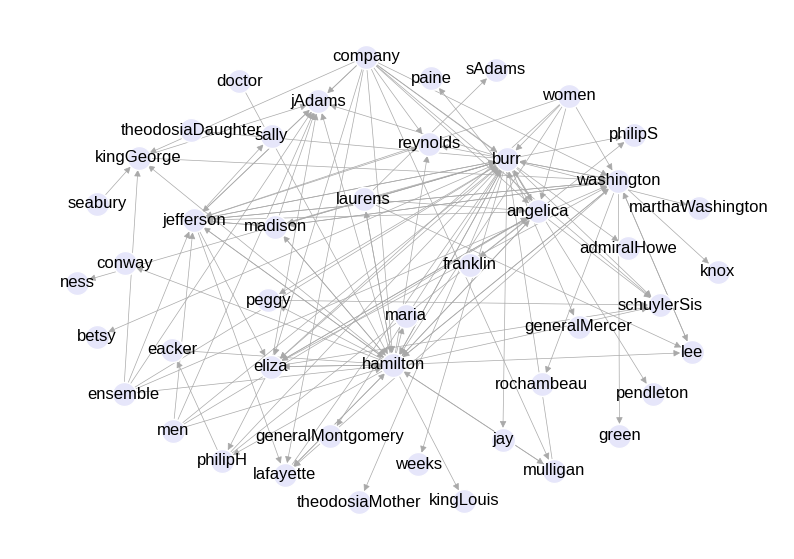

In [8]:
import pandas as pd

# import data for our directed network
df = pd.read_csv("https://philchodrow.github.io/PIC16A/homework/HW3-hamilton-data.csv",
names = ["mentioner", "mentioned"])

df = df[df["mentioner"] != df["mentioned"]]

G_Hamilton = nx.from_pandas_edgelist(df,
                            source = "mentioner",
                            target = "mentioned",
                            edge_attr=None,
                            create_using=nx.DiGraph())

layout = nx.arf_layout(G_Hamilton)

fig, ax = plt.subplots(1, 1, figsize = (10, 7))
nx.draw(G_Hamilton, pos = layout,  with_labels = True, edge_color = "darkgrey", width = 0.5, node_color = "lavender", edgecolors = "white")

# This is a coding exercise in the live notes.

# Create and print a numpy array of node in-degrees and out-degrees directly from the adjacency matrix

Let's calculate the in-degrees of the nodes in the Hamilton network using the adjacency matrix and compare to the networkx built-ins.

In [9]:
A = nx.adjacency_matrix(G_Hamilton)
in_degree_vector = np.sum(A, axis=0)
in_degree_view = G_Hamilton.in_degree()

i = 0
for name, degree in dict(in_degree_view).items():
    if i < 5:
        print(f"{name} has degree: {degree} (networkx) and {in_degree_vector[i]} (adjacency matrix)")
        i += 1

burr has degree: 13 (networkx) and 13 (adjacency matrix)
hamilton has degree: 14 (networkx) and 14 (adjacency matrix)
weeks has degree: 1 (networkx) and 1 (adjacency matrix)
madison has degree: 4 (networkx) and 4 (adjacency matrix)
jay has degree: 1 (networkx) and 1 (adjacency matrix)


::: {.callout-important}

## Exercise

Repeat this calculation and check that you can also compute *out*-degrees, with a matching result.

:::

### Regular Graphs


The degree sequence can contain a lot of information about the graph structure. One important class of graphs has constant degree:  


::: {.callout-note icon=false appearance="minimal"}
::: {#def-regulargraph}

A network in which all nodes have the same degree is called a **regular graph** or **regular network**. A regular graph where all nodes have degree $k$ is called **$k$-regular**.

:::
:::

Some special cases of regular graphs are **lattices** (e.g., a square lattice is 4-regular) and the **complete graph** where every node is connected to every other node (which is $(n-1)$-regular).

In [ ]:

fig, ax = plt.subplots(1, 1, figsize = (2, 2))
G = nx.complete_graph(5)
nx.draw(G, **plot_kwargs)

Regular graphs are of great interst in theoretical mathematics and computer science. We don't *usually* spend a lot of time studying them in network science because most interesting systems and data sets are not regular.

## Density and Sparsity

::: {.callout-note icon=false appearance="minimal"}
::: {#def-density}

The **density** or **connectance** $\rho$ of a simple network is the fraction of possible edges that are actually present. That is,

$$
    \rho = \frac{\text{number of edges}}{\text{possible edges}} = \frac{m}{\binom{n}{2}} \,.
$$

:::
:::

One way to interpret density is to think of it as a probability that a pair of nodes picked uniformly at random is connected by an edge.

We can rewrite density in terms of expected degree using our earlier exercises [This simplification comes from the binomial coefficient formula $\binom{n}{k} = \frac{n!}{k!(n-k)!}$. Also, we can notice the cool fact that $n \choose 2$ is equivalent to the sum of the first $n-1$ integers!]{.aside}:

$$
\begin{align}
    \rho &= \frac{m}{\binom{n}{2}} \\
    &= \frac{m}{\frac{1}{2}n(n-1)} \\
    &= \frac{2m}{n(n-1)} \\
    &= \frac{c}{n-1} \,.
\end{align}
$$

If a network is sufficiently large, you can approximate the density as $\rho \approx \frac{c}{n}.$

Let's compute density in network below using three different strategies:

- Calculating directly using number of edges and number of nodes;
- Calculating directly using mean degree and number of nodes;
- Using the built-in NetworkX function `nx.density()`.

In [ ]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

# Create an unweighted version of the Les Mis network
G = G_LesMis

# This is a coding exercise in the live notes.

# Calculate density directly using number of edges and number of nodes



# Calculate density directly using mean degree and number of nodes
# Hint: you may want to calculate degree from the adjacency matrix so that you can calculate mean using numpy

-

# Use the built-in NetworkX function nx.density()



Informally, we call a network *sparse* when it has low density. This is pretty tricky to formally define: how low is "low enough?" There isn't a universally agreed upon threshold for density below which a real-world network would be considered sparse. However, we can create a definition which applies for certain theoretical models of networks. Many models are defined for graphs on $n$ nodes. If we have a model where we can take a formal limit as $n$ grows large, then such a network is *sparse* if $\rho \to 0$ as $n \to \infty$. In this scenario, the mean degree grows (much) more slowly than the number of nodes. We'll study limiting arguments about sparse graphs much more when we discuss [random graphs](09-random-graphs.qmd).  

::: {.callout-important}

## Exercise

Let $\{G_n\}$ be a sequence of networks on $n$ nodes which are $k$-regular for some fixed constant $k$. Show that this sequence is sparse in the sense defined above. [There is a small cheat in this problem statement, since if $k$ and $n$ are both odd then it is not possible to form a valid network (since $kn = 2m$, $kn$ must always ben even). This kind of detail does not usually pose difficulties in the study of sparse network.]{.aside}

:::

::: {.hide .solution}

The density of $G_n$ is $\rho = \frac{k}{n-1}$ by the previous problem, so we have $\lim_{n\to\infty} \rho = 0$.

:::


## Walks and Paths

We may like to know if it it is possible to reach one node from another by traversing edges. For this task, we introduce the notion of a *walk*.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-walk}

A **walk** of length $k \geq 2$ is a set of edges $\{ (i_1,j_1), (i_2, j_2), \dots, (i_k, j_k)\}$ with the property that $i_l = j_{l-1}$ for each $2 \leq l \leq k$. We say this is a walk from node $i_1$ to node $j_k.$

The **length** of a walk is the number of edges it contains.

A single edge $(i,j)$ is always considered a walk of length 1 from $i$ to $j$.

:::
:::


In [ ]:

from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(1, 1, figsize = (3, 3))

graph_dict = {1: [2], 2: [1, 3], 3:[2], 4:[5,6], 7: [4]}
G = nx.Graph(graph_dict)
nx.draw(G, with_labels = True, font_color = 'white', font_weight = 'bold', edgecolors = "white", ax = ax, node_size = 200, font_size = 10, edge_color = "darkgrey")

### Connected Graphs

It is not always the case that there exists a walk between two specified nodes, as shown in @fig-walk-nonexample. In many networks, it's very important that there exist a walk between any two nodes (think, for example, of a power grid!), and we have a special definition to reflect this:

::: {.callout-note icon=false appearance="minimal"}
::: {#def-tree}

A **connected graph** is a graph with the property that, between every pair of nodes $i$ and $j$, there exists a walk from $i$ to $j$.

:::
:::

There are several ways to determine computationally whether a graph is connected.

::: {.callout-important}

## Exercise

Outline an algorithm for determining whether a simple undirected graph is connected by progressively querying node neighbors. Assume that you know ahead of time how many total nodes exist in the network.

:::

### Counting Walks

A question that pops up a lot in network analysis is "How many walks of length $r$ exist between nodes $i$ and $j$?" The adjacency matrix gives a concise way to address this question. First, let’s consider $r=1$. That’s just the number of edges from node $j$ to $i$, which is exactly $A_{ij}$. Said in a slightly more cumbersome way,

> The $ij$th entry of ${\bf A}^1$ counts the number of walks of length 1 from node $j$ to node $i$.

This observation generalizes by induction.

::: {.callout-tip icon=false collapse=true}
::: {#thm-walks}

## Counting Walks with Powers of $\mathbf{A}$

The $ij$th entry of the matrix ${\bf A}^r$ contains the number of walks of length $r$ from $j$ to $i$.

:::
:::

::: {.hide .proof}

We proceed by induction on walk length $r$. We discussed the base case above: that is, the $ij$th entry of the adjacency matrix ${\bf A}_{ij} =  {\bf A}_{ij}^1$ gives us walks of length 1, by definition.

Now, suppose that ${\bf A}^r$ gives the number of walks of length $r$; we will show that ${\bf A}^{r+1}$ gives the number of walks of length ${r+1}$. By definition, ${\bf A}^{r+1} = {\bf A}^{r}{\bf A}.$ Thinking about matrix multiplication as an inner product, we see that the $ij$ entry can be written

$$
    A_{ij}^{r+1} = \sum_{l=1}^n [A^r]_{il}A_{lj} \,,
$$

that is, entry $ij$ comes from summing the componentwise product of the $i$th row of ${\bf A}^r$ with the $j$th column of ${\bf A}.$

The number of walks from node $j$ to $i$ of length $r+1$ is equivalent to the number of walks of length $r$ from $j$ to $l$ multiplied by the number of length $1$ walks from $l$ to $i$, which is exactly the quantity we have written above. This completes the proof.

:::

There are many applications of this idea:

::: {.callout-important}

## Exercise

What is $\frac{1}{2}\mathrm{trace} \; \mathbf{A}^2$, in terms of quantities we've seen before?

:::

::: {.hide .solution}

By definition, $[\mathbf{A}^2]_{ii}$ is the number of walks of length $2$ from node $i$ to itself. The only way to do a walk of length 2 is to go from $i$ to $j$ and then back to $i$, where $j$ is a neighbor of $i$. So, $[A^2]_{ii} = \sum_{j=1}^n A_{ij}A_{ji} = \sum_{j=1}^n A_{ij}^2 = k_i$. The trace of a matrix is the sum of its diagonal entries, so $\frac{1}{2}\mathrm{trace} \; \mathbf{A}^2 = \frac{1}{2}\sum_{i=1}^n k_i = m$.

:::



::: {.callout-important}

## Exercise

Give a mathematical criterion for a graph to be connected by considering the matrix

$$
\mathbf{M} = \sum_{i = 1}^{n-1} \mathbf{A}^i \,.
$$

:::

::: {.hide .solution}

If $G$ is connected, then there must be a walk from any node to any other node. We can assume without loss of generality that these walks are of length $n-1$ or less, since otherwise we would be unnecessarily revisiting nodes. So, $G$ is connected if and only if there exists a walk of no more than length $n-1$ from any node to any other node. This is equivalent to the requirement that all the entries of the matrix $\mathbf{M}$ above be strictly positive.

:::



### Paths

Paths are special walks which do not repeat any edges.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-path}

A **path** is a walk that is not self-intersecting. That is, any edge $(i,j)$ shows up in a path at most once.

A **geodesic path** or **shortest path** is from $i$ to $j$ is a path fom
$i$ to $j$ of minimum length; i.e. a path such that no other path has shorter length.

The length of a geodesic path is called the **(geodesic) distance** between $i$ and $j$. If two nodes are not path-connected, their geodesic distance is undefined.

:::
:::

Here is an example of a geodesic path between two nodes in Zachary's Karate Club network. The geodesic distance between these two nodes is 5.

In [ ]:
# code example adapted from: https://stackoverflow.com/questions/24024411/highlighting-the-shortest-path-in-a-networkx-graph

np.random.seed(123)

G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G,pos, **plot_kwargs)

path = nx.shortest_path(G, source = 14, target = 16)
pos_path = {i: pos[i] for i in path}
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos_path,nodelist=path,node_color='steelblue', node_size = 100, edgecolors = "black")
nx.draw_networkx_edges(G,pos_path,edgelist=path_edges,edge_color='k',width=1)

Shortest paths are not necessarily unique; there may be more than one path of the same length between two nodes. There exist several algorithms for computing the shortest path between a pair of nodes or between every pair of nodes in a graph.

- Dijkstra's algorithm [@dijkstra2022note] is frequently used to compute shortest paths with a single fixed node as the point of origin.
- The Floyd-Warshall algorithm [@rosen2011discrete] is a common choice for computing the shortest path between all pairs of nodes in a graph.

::: {.callout-important}

Explain briefly why shortest paths are *self-avoiding*: the same node cannot appear twice in a shortest path.

:::

::: {.hide .solution}

This is because if a shortest path intersected itself, this would create a loop which could be removed to create a shorter path.

:::




## Cyclic and Acyclic graphs

Many algorithms and measures of graph structure reflect the existence of *cycles* within a graph.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-cycle}

## Cycles

A **cycle** is a path from a node $i$ to itself.

A network with no cycles is **acyclic**.

:::
:::

[By definition, self-edges are cycles of length 1. Multigraphs without self-edges can have cycles of length 2. Cycles in simple graphs are always of length 3 or more.]{.aside}

::: {.callout-important}

## Exercise

How could we use the adjacency matrix $\mathbf{A}$ to compute the number of cycles of length $r$ in a network starting and ending at node $i$?

:::

::: {.hide .solution}

Since a cycle can be represented as a walk from a node $i$ to itself @thm-walks tells us that we are looking for $[\mathbf{A}^r]_{ii}$, the $i$th diagonal element of the matrix $\mathbf{A}^r$.

**Note**: this quantity separately counts cycles where the same nodes are visited in a different order. For example, the cycle $1 \to 2 \to 3 \to 1$ is counted separately as the cycle $1 \to 3 \to 2 \to 1.$

:::

In some cases, it is useful to check a network to determine whether it contains *any* cycles.
While the adjacency matrix can be used to count cycles of a specific length, it could be quite inefficient to use to detect whether we have a cycle of any length (because we may have to check the diagonal entries of ${\bf A}^r$ for all possible cycle lengths $r$). We can construct a simple algorithm to determine computationally whether a network is cyclic or acyclic. For the purposes of this algorithm, we'll consider directed graphs; the algorithm can be easily adapted to undirected graphs. Here it is:

While $n > 0$:

- Find a node $i$ with no out-edges (i.e. $k_i^{\mathrm{out}} = 0$).
    - If no such node exists, *then the network is cyclic*.
- Remove node $i$ and all its edges.

If all nodes can be removed this way, *then the network is acyclic*.

::: {.callout-important}

## Exercise

Give a simple argument for why the algorithm above works. In particular:

1. Why is this algorithm guaranteed to terminate?
2. Why is this algorithm guaranteed to give the correct answer upon termination?

:::

Now that we're convinced that the algorithm works, let's go ahead and implement it in Python. Our implementation accepts a NetworkX `DiGraph` object as an argument, returning `True` if the network is cyclic and `False` if the network is acyclic.

Now let's test our algorithm on a few examples. First, we'll construct a random toy directed graph that we know does not possess any cycles by its construction. Indeed, our implemented cycle detector indicates that no cycles are present.

In [ ]:

print('Binomial Tree:', end = " ")

fig, ax = plt.subplots(1, 1, figsize = (3, 3))
G_Tree = nx.binomial_tree(4, create_using = nx.DiGraph)
nx.draw(G_Tree,  **plot_kwargs)
if is_cyclic(G_Tree):
    print("cyclic.")
else:
    print("acyclic.")

On the other hand, the Hamilton mentions network contains at least one cycle:

In [ ]:

print('Hamilton Network:', end = " ")
layout = nx.arf_layout(G_Hamilton)
fig, ax = plt.subplots(1, 1, figsize = (3, 3))
nx.draw(G_Hamilton, layout, **plot_kwargs)
is_cyclic(G_Hamilton)
if is_cyclic(G_Hamilton):
    print("cyclic.")
else:
    print("acyclic.")

This algorithm has a nice mathematical consequence. If we label the nodes in an acyclic network according to the order we removed them, we will end up with an adjacency matrix that is *strictly upper triangular*. This is because each node that is removed could only have out-edges that were already removed previously, i.e., nonzero entries of the $i$th column could only occur between columns 1 and $i-1$. There exists at least one such labeling for any acyclic network.

### Trees

::: {.callout-note icon=false appearance="minimal"}
::: {#def-tree}

A **tree** is a connected, acyclic network. By "connected", we mean every node is reachable from every other node by traversing a sequence of edges, i.e., there exists a walk between any two nodes.

Trees can be both directed and undirected. When we refer to *trees* with no further descriptors, we usually mean undirected trees.

:::
:::

All trees are necessarily simple graphs, because self- and multiedges would create cycles. Trees always have exactly $n-1$ edges, as can be proven via induction. Furthermore, any connected graph with $n-1$ edges is a tree.


Trees are often drawn as *rooted trees* with a *root node* at the top and *leaf nodes* below. Any node can be chosen as the root of a tree.


In [ ]:


edges = [(0,1), (0,2), (1,3), (1,4), (2,5), (2,6), (2, 7), (7, 8)]

pos = {
    0 : (0, 0),
    1 : (-1, -1),
    2 : (1, -1),
    3 : (-1.5, -2),
    4 : (-0.5, -2),
    5 : (0.5, -2),
    6 : (1.0, -2),
    7 : (1.5, -2),
    8:  (1.5, -3)
}

fig, ax = plt.subplots(1, 1, figsize = (3, 3))
G_Tree = nx.Graph(edges)
nx.draw(G_Tree, pos = pos, **plot_kwargs)

Trees play important roles, especially in math and computer science. Trees have many useful properties that we can exploit for network analysis. One of the most important ones is the uniqueness of paths: there is exactly one path between any pair of nodes (as long as we don't allow "backtracking"). Many calculations on networks with this property are simple(r).


## References
